In [44]:
from collections import Counter
words = ["hello", "world", "hello", "test"]
word_counts: Counter = Counter(words)
    # Sorting the words from most to least frequent in text occurrence.
sorted_vocab = sorted(word_counts, key = word_counts.get, reverse=True)

int_to_vocab = {i: word for i, word in enumerate(sorted_vocab)}
vocab_to_int = {word:i for i,word in enumerate(sorted_vocab)}


print(int_to_vocab)
print(vocab_to_int)



{0: 'hello', 1: 'world', 2: 'test'}
{'hello': 0, 'world': 1, 'test': 2}


In [ ]:
words = ["apple", "banana", "cherry", "date", "apple", "banana", "banana"]
threshold: float = 1e-5
import math
vocab_to_int = {"apple": 0, "banana": 1, "cherry": 2, "date": 3}
int_words= []
for word in words:
    int_words.append(vocab_to_int[word])


freqs = {}
probs = {}
train_words = []

for word in words:
    if word not in freqs:
        freqs[word] = 1
    else:
        freqs[word] += 1

for i in range(len(words)):
    word = words[i]
    if word not in probs:
        probs[word] = 1 - math.sqrt(threshold / freqs[word])

train_words = [word for word in words if probs[word] >= 0.5]

{'apple': 2, 'banana': 3, 'cherry': 1, 'date': 1}

In [71]:
words = ["apple", "banana", "cherry", "date", "apple", "banana", "banana"]
c = 3
a = []
for i in range(2*c + 1):
    if i != c:
        a.append(words[i])
a



['apple', 'banana', 'cherry', 'apple', 'banana', 'banana']

In [108]:
import random
words = ["the", "quick", "brown", "fox", "jumps", "over", "the", "lazy", "dog"]
idx = 6 # For the word "jumps"
window_size = 5  # Test with a smaller window

window = random.randint(1,window_size)
print(window)

left = words[max(idx-window, 0) : idx]
right = words[idx + 1 : idx + 1 + window]


left + right

4


['brown', 'fox', 'jumps', 'over', 'lazy', 'dog']

In [11]:
import torch
from src.skipgram import SkipGramNeg
n_vocab = 100
n_embed = 50
model = SkipGramNeg(n_vocab, n_embed)
input_words = torch.randint(0, n_vocab, (10,))  # A batch of 10 random word indices
input_vectors: torch.Tensor = torch.tensor(input_words)
model.forward_input(input_words)

input_vectors.shape


/var/folders/71/l1gpfd6j731c1qxy1_l8ffvh0000gn/T/ipykernel_51772/1188014681.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_vectors: torch.Tensor = torch.tensor(input_words)


torch.Size([10])

/Users/luisgarciaalvarez/opt/anaconda3/lib/python3.9/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


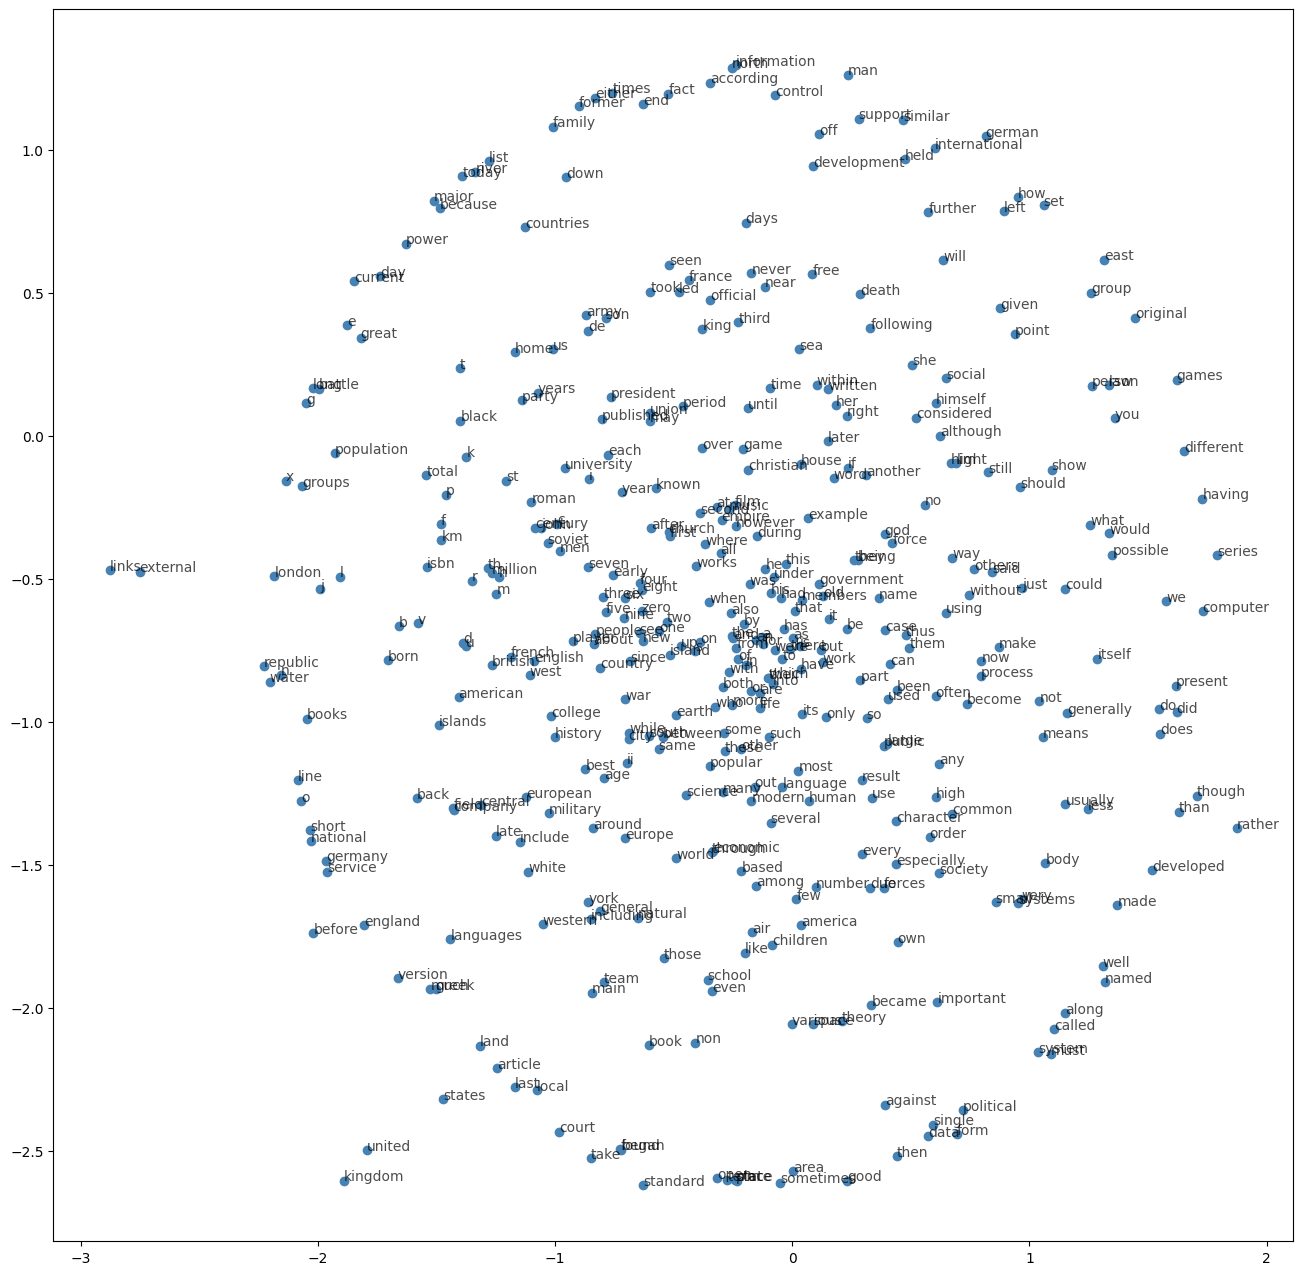

Visualization complete.


In [8]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from src.skipgram import SkipGramNeg
import torch
try:
    from src.data_processing import load_and_preprocess_data, create_lookup_tables, subsample_words, get_batches, cosine_similarity
    from src.skipgram import SkipGramNeg
    from src.train import train_skipgram
    from src.utils import plot_embeddings, save_model
except:
    from src.data_processing import load_and_preprocess_data, create_lookup_tables, subsample_words, get_batches, cosine_similarity
    from src.skipgram import SkipGramNeg
    from src.train import train_skipgram
    from src.utils import plot_embeddings, save_model


def plot_embeddings(model, int_to_vocab, viz_words=400, figsize=(16, 16)):
    """
    Plots a subset of word embeddings in a 2D space using t-SNE.

    Args:
        model: The trained SkipGram model containing the embeddings.
        int_to_vocab: Dictionary mapping word indices back to words.
        viz_words (int): Number of words to visualize.
        figsize (tuple): Size of the figure for the plot.
    """
    # Extract embeddings
    embeddings = model.in_embed.weight.to('cpu').data.numpy()
    
    # Reduce the dimensionality of embeddings with t-SNE
    tsne = TSNE()
    embed_tsne = tsne.fit_transform(embeddings[:viz_words, :])
    
    # Plotting
    fig, ax = plt.subplots(figsize=figsize)
    for idx in range(viz_words):
        plt.scatter(*embed_tsne[idx, :], color='steelblue')
        plt.annotate(int_to_vocab[idx], (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7)
    
    plt.show()
embedding_dim = 300
batch_size = 512
epochs = 5
learning_rate = 0.003
window_size = 5
print_every = 1500
runs_folder = "runs"  # Folder to save models
model_filename = "skipgram_model.pth"  # Filename to save the model
file_path = 'data/text8'
train_model = True
device = 'cuda' if torch.cuda.is_available() else 'cpu'
tokens = load_and_preprocess_data(file_path)
vocab_to_int, int_to_vocab = create_lookup_tables(tokens)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SkipGramNeg(len(vocab_to_int), embedding_dim)  # Usa los mismos parámetros que entrenaste
model.load_state_dict(torch.load("runs/skipgram_model.pth", map_location=device))
model.to(device)
model.eval()  # Poner el modelo en modo evaluación

plot_embeddings(model, int_to_vocab, viz_words=400)
print("Visualization complete.")